In [4]:
# Importar librerías 
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from config import a_v_token

_(Imagen de referencia del dashboard)_
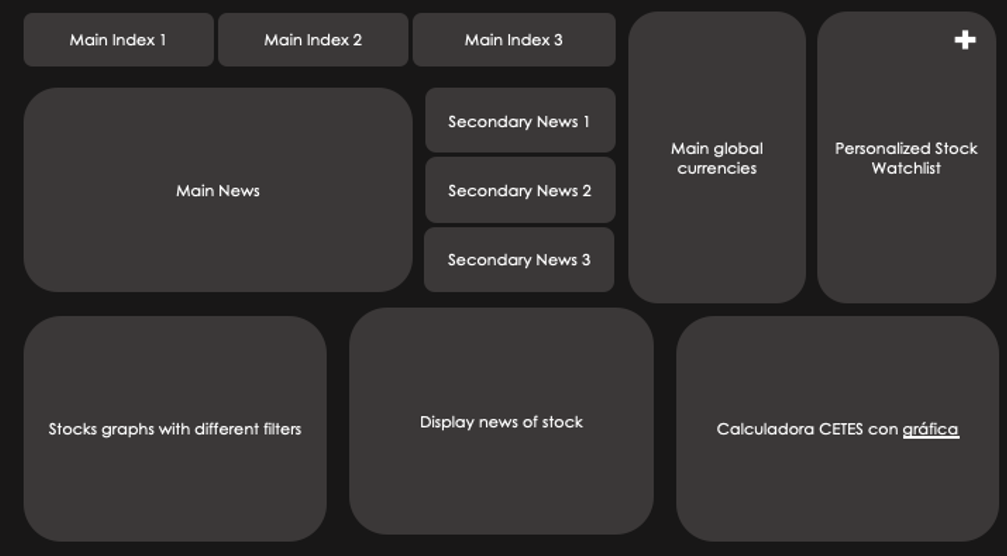

___
**`STOCK GRAPHS WITH DIFFERENT FILTERS`**

Ticker: AAPL
Starting date (YYYY-MM-DD): 2020-01-01
Ending date (YYYY-MM-DD): 2023-01-01
[*********************100%%**********************]  1 of 1 completed


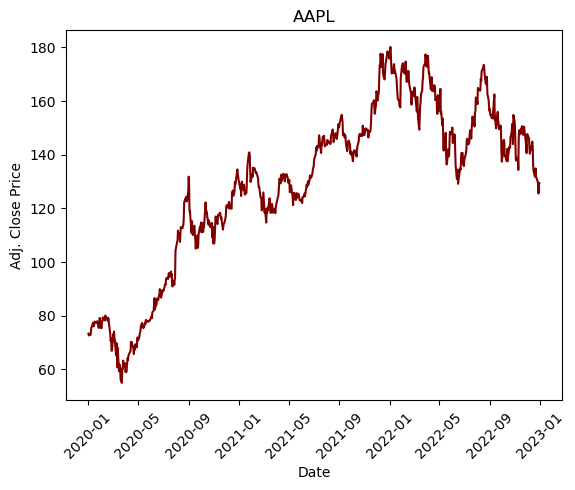

In [5]:
# Definir ticker y fechas
ticker = input('Ticker: ')
st_date = input('Starting date (YYYY-MM-DD): ')
end_date = input('Ending date (YYYY-MM-DD): ')

# Obtener los datos
data = yf.download(ticker, st_date, end_date)

# Graficar
plt.plot(data['Adj Close'], c='maroon')
plt.title(ticker)
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.xticks(rotation = 45)
plt.show()

___
**`DISPLAY NEWS OF STOCKS`**

In [6]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={st_date.replace('-', '')+'T0000'}&limit=3&sort=RELEVANCE&apikey={a_v_token}"
r = requests.get(url)
data = r.json()

In [7]:
[data['feed'][i]['summary'] for i in range(5)]

['Following a quiet reshuffling of its repair pricing, Apple Inc. AAPL has imposed a higher fee for out-of-warranty battery replacements for certain Apple Watch models. What Happened: As detailed in a recent 9to5Mac report, Apple has raised the battery replacement price for its Apple Watch Series 4 ...',
 "Apple Inc.'s AAPL decision to abandon plans to scan iPhones for child sexual abuse material ( CSAM ) has invited the wrath of protestors, who have now set up banners in front of Apple Park to coincide with the iPhone 15 launch.",
 'Apple to issue iPhone 12 update in France after sales halted over radiation levels CNN International ...',
 'Apple to issue iPhone 12 update in France after sales halted over radiation levels ...',
 'Apple Inc. AAPL spoke at length about the new titanium alloy design on the iPhone 15 Pro, but there could be a problem. Some people who got their hands on the iPhone 15 Pro suggest that this new titanium alloy design could be a fingerprint and grease magnet.']

___
**`MAIN NEWS`**

In [2]:
# Seleccionar tema
topic = input('Topic: ')

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics={topic}&limit=4&sort=RELEVANCE&apikey={a_v_token}'
r = requests.get(url)
data = r.json()
data['feed'][0]['summary']

Topic: blockchain


"'This isn't some random dude with a duffel bag': To catch fentanyl traffickers, feds dig into crypto markets ..."

___
**`Secondary News 1, 2 & 3`**

In [9]:
[data['feed'][i+1]['summary'] for i in range(3)]

["Here's a framework you can use to find the best opportunities in the banking industry.",
 "Lower inflation and lower interest rates would relieve the heavy pressure on Upstart's business model.",
 'In the latest trading session, Silvergate Capital Corporation (SI) closed at $1.62, marking no change from the previous day.']

___
`News summarization`

In [11]:
# Obtener las ligas
links = [data['feed'][i]['url'] for i in range(4)]

In [10]:
# Librerías
from newspaper import Article
import nltk
nltk.download()                        # verificar que esté descargado

*Código inspirado de [towardsdatascience.com](https://towardsdatascience.com/scrape-and-summarize-news-articles-in-5-lines-of-python-code-175f0e5c7dfc) (Artem, 2019)*

In [20]:
def get_summary(link):
    # Web Scrapping 
    article = Article(link)
    article.download()
    article.parse()
    article.nlp()
    return article.summary

In [25]:
for new in range(len(links)):
    print(get_summary(links[new]))
    print()

“This isn’t some random dude with a duffel bag” selling fentanyl in daylight.
Martin Urista/APThe Sinaloa Cartel has made hundreds of millions of dollars from the fentanyl trade, according to the Justice Department.
A recent CNN investigation dug into the activities of US-sanctioned Chinese chemical companies that advertise fentanyl ingredients.
One of the firms, London-based Elliptic, found 100 China-based chemical companies touting fentanyl, fentanyl ingredients or equipment to make the drugs that accepted payments in cryptocurrency.
Elliptic didn’t identify any cartel-controlled crypto accounts that sent money to the Chinese companies.

But what does it really mean—and how do you go about mining Bitcoin?
Approximately every four years, the reward for mining Bitcoin is halved, an event known (unsurprisingly) as the “halving”.
China's Bitcoin mining crackdown, and beyondAs Bitcoin mining has matured, the barrier to entry for individual miners has been raised.
A succession of mining ba

___
`Principales Monedas Globales`

In [10]:
default_currency = 'USD'
chosen_currency = input('Moneda de referencia (USD, por defecto): ') 
vs_currency = chosen_currency if chosen_currency else default_currency
currencies = ['MXN','AUD','JPY', 'GBP']

exchange_rate = {}
bid_price = {}
ask_price ={}

for c in currencies:
    url = f"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={c}&to_currency={vs_currency}&apikey={a_v_token}"
    r = requests.get(url)
    data = r.json()
    data = data['Realtime Currency Exchange Rate']
    exchange_rate[c] = data['5. Exchange Rate']
    bid_price[c] = data['8. Bid Price']
    ask_price[c] = data['9. Ask Price']
    
df = pd.DataFrame({
            'Moneda': currencies,
            'Tipo de Cambio': exchange_rate.values(),
            'Compra': bid_price.values(),
            'Venta': ask_price.values()
    })
df

Moneda de referencia:  


,Moneda,Tipo de Cambio,Compra,Venta
0,MXN,0.05805000,0.05804700,0.05805000
1,AUD,0.64376000,0.64375200,0.64378000
2,JPY,0.00673000,0.00672900,0.00673000
3,GBP,1.22390000,1.22389000,1.22391000
